In [3]:
# https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/
%matplotlib inline

import pandas
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot

import statsmodels
import statsmodels.api as sm


df_amzn = pandas.read_excel('amzn.xlsx')
close_amzn = df_amzn['Close']


plt.plot(close_amzn)
plt.show()

lag_plot(close_amzn)
plt.show()

autocorrelation_plot(close_amzn)
plt.show()

autocorrelation_plot(np.diff(np.log(close_amzn)))
plt.show()


ModuleNotFoundError: No module named 'statsmodels'

Lag: 2
Coefficients: [9.38180027e+00 9.86680196e-01 7.68307079e-03]


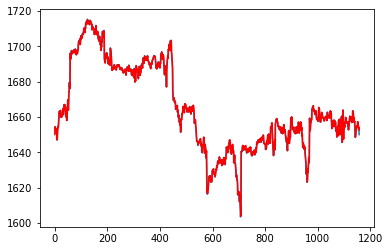

In [139]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

# train autoregression
# split dataset
X = close_amzn.values
train, test = X[1:len(X)-200], X[len(X)-200:]

window =2 
model = statsmodels.tsa.ar_model.AutoReg(train, window)
model_fit = model.fit()

coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
fittedvalues = list()
for t in range(len(train)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = train[t]
    fittedvalues.append(yhat)
    history.append(obs)
    
print('Lag: %s' % window)
print('Coefficients: %s' % model_fit.params)

plt.plot(train)
plt.plot(fittedvalues, color='red')
plt.show()

In [141]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

# split dataset
X = close_amzn

window =100
train, test = X[window:len(X)-200], X[len(X)-200:]

# train autoregression
model = statsmodels.tsa.ar_model.AutoReg(train, window)
model_fit = model.fit()

print('Lag: %s' % window)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.forecast(steps=len(test))
error = mean_squared_error(test,predictions)
print('Test MSE: %.3f' % error)

Lag: 100
Coefficients: const         12.118846
Close.L1       0.998569
Close.L2      -0.082166
Close.L3       0.053336
Close.L4       0.040671
                ...    
Close.L96     -0.029655
Close.L97      0.064101
Close.L98     -0.029224
Close.L99     -0.019745
Close.L100     0.012837
Length: 101, dtype: float64
Test MSE: 712.100
